In [ ]:
# загрузим необходимые библиотеки
!pip install sweetviz
import pandas as pd
import sweetviz as sv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 50.7 MB/s eta 0:00:00


# Предобработка

In [ ]:
# сохраним и откроем датасет
dt = pd.read_excel('/content/СПР_0-30000_для нейр.xlsx', skiprows=2)
dt.head(10)

,ID пробега,Серия,Номер секции,Позиция секции,Дата начала,Дата окончания,Позиция КП,"Общий пробег, км",1_Пробег по R < 450 м,1_Пробег по R из [450; 800) м,...,14_Пробег по R >= 1200 м,15_Пробег по R < 450 м,15_Пробег по R из [450; 800) м,15_Пробег по R из [800 1200) м,15_Пробег по R >= 1200 м,16_Пробег по R < 450 м,16_Пробег по R из [450; 800) м,16_Пробег по R из [800 1200) м,16_Пробег по R >= 1200 м,Результат определения срока обточки
0,117852,2М62,409,1,2021-08-06,2022-07-29,1.0,7561.548,96.286,289.557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,своевременно
1,117851,2М62,409,1,2021-08-06,2022-07-29,3.0,7561.548,96.286,289.557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,своевременно
2,117850,2М62,409,1,2021-08-06,2022-07-29,6.0,7561.548,96.286,289.557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,своевременно
3,117853,2М62,409,2,2021-08-06,2022-06-21,4.0,6309.123,83.469,213.752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,своевременно
4,303749,2М62,409,2,2022-06-21,2022-09-01,4.0,2732.223,43.548,217.889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,своевременно
5,139969,2М62,409,2,2021-09-11,2022-06-21,6.0,4369.659,73.495,187.083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,своевременно
6,69731,2М62,444,1,2021-05-16,2022-04-22,3.0,31255.251,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,своевременно
7,102980,2М62,444,1,2021-07-12,2021-11-18,6.0,11750.317,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,своевременно
8,76634,2М62,444,2,2021-05-27,2021-10-13,1.0,14467.955,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,своевременно
9,159072,2М62,444,2,2021-10-13,2022-06-21,1.0,22762.287,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,своевременно


In [ ]:
# посмотрим общий размер датасета
dt.shape

(30381, 73)

In [ ]:
# проверим типы данных
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30381 entries, 0 to 30380
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID пробега                           30381 non-null  int64         
 1   Серия                                30381 non-null  object        
 2   Номер секции                         30381 non-null  int64         
 3   Позиция секции                       30381 non-null  int64         
 4   Дата начала                          30381 non-null  datetime64[ns]
 5   Дата окончания                       30381 non-null  datetime64[ns]
 6   Позиция КП                           30352 non-null  float64       
 7   Общий пробег, км                     30381 non-null  float64       
 8   1_Пробег по R < 450 м                30381 non-null  float64       
 9   1_Пробег по R из [450; 800) м        30381 non-null  float64       
 10  1_Пробег п

In [ ]:
# найдем пропуски датасета
dt.isna().sum().sort_values(ascending=False)

Позиция КП                             29
ID пробега                              0
10_Пробег по R из [800 1200) м          0
12_Пробег по R из [450; 800) м          0
12_Пробег по R < 450 м                  0
                                       ..
5_Пробег по R < 450 м                   0
4_Пробег по R >= 1200 м                 0
4_Пробег по R из [800 1200) м           0
4_Пробег по R из [450; 800) м           0
Результат определения срока обточки     0
Length: 73, dtype: int64

Обнаружены пропуски в данных в столбце "Позиция КП"

In [ ]:
# удалим пропуски
dt.dropna(inplace=True)

In [ ]:
# изменим тип данных столбца "Позиция КП"
dt["Позиция КП"] = dt["Позиция КП"].astype(int)

In [ ]:
# создадим столбец с днями обточки
dt['Период обточки'] = (dt['Дата окончания']-dt['Дата начала']).dt.days

In [ ]:
# построим матрицу корреляции
#sv.analyze(dt).show_notebook()

Целевой параметр "Период обточки" имеет высокую корреляцию с "Общим пробегом"

# Создание и обучение моделей

In [ ]:
# Импортируем для создания полносвязной сети и модели
from tensorflow.keras.models import Sequential

# Необходимые слои
from tensorflow.keras.layers import Dense, Dropout

# Импортируем оптимизаторы
from tensorflow.keras.optimizers import Adam

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    plt.plot(history.history['mae'],
            label='Средняя абсолютная ошибка на обучающем наборе')
    plt.plot(history.history['val_mae'],
            label='Средняя абсолютная ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Средняя абсолютная ошибка')
    plt.legend()
    plt.show()

In [ ]:
# данные о пробеге по кривым на участках
dt_dist = dt.drop(columns=['ID пробега','Серия','Номер секции','Позиция секции',
                           'Дата начала','Дата окончания','Позиция КП',
                           'Общий пробег, км',
                           'Результат определения срока обточки'])
dt_dist

,1_Пробег по R < 450 м,1_Пробег по R из [450; 800) м,1_Пробег по R из [800 1200) м,1_Пробег по R >= 1200 м,2_Пробег по R < 450 м,2_Пробег по R из [450; 800) м,2_Пробег по R из [800 1200) м,2_Пробег по R >= 1200 м,3_Пробег по R < 450 м,3_Пробег по R из [450; 800) м,...,14_Пробег по R >= 1200 м,15_Пробег по R < 450 м,15_Пробег по R из [450; 800) м,15_Пробег по R из [800 1200) м,15_Пробег по R >= 1200 м,16_Пробег по R < 450 м,16_Пробег по R из [450; 800) м,16_Пробег по R из [800 1200) м,16_Пробег по R >= 1200 м,Период обточки
0,96.286,289.557,457.013,6574.735,0.0,0.0,0.0,21.01,0.0,1.05,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,357
1,96.286,289.557,457.013,6574.735,0.0,0.0,0.0,21.01,0.0,1.05,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,357
2,96.286,289.557,457.013,6574.735,0.0,0.0,0.0,21.01,0.0,1.05,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,357
3,83.469,213.752,387.838,5603.054,0.0,0.0,0.0,21.01,0.0,0.00,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,319
4,43.548,217.889,172.522,2175.317,0.0,0.0,0.0,0.00,0.0,1.05,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30376,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,475.358,642.148,309.076,2685.527,0.0,0.0,0.0,0.0,104
30377,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,94
30378,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,715.532,1046.467,520.569,4360.073,0.0,0.0,0.0,0.0,170
30379,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,475.358,642.148,309.076,2685.527,0.0,0.0,0.0,0.0,104


In [ ]:
# данные о пробеге по кривым на участках
dt_dist.shape

(30352, 65)

In [ ]:
y_data = dt_dist['Период обточки'].values
x_data = dt_dist.drop(columns=['Период обточки']).values

In [ ]:
print('Размер нормализованных числовых данных обучающей выборки', x_data.shape)
print('Размер нормализованных правильных ответов', y_data.shape)

Размер нормализованных числовых данных обучающей выборки (30352, 64)
Размер нормализованных правильных ответов (30352,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

# нормируем числовые данные
x_scaler = MinMaxScaler()
x_scaled = x_scaler.fit_transform(x_data)

y_scaler = MinMaxScaler()
y_scaled = y_data.reshape(-1,1)
y_scaled = y_scaler.fit_transform(y_scaled)

print('Размер нормализованных MinMaxScaler данных обучающей выборки', x_scaled.shape)
print('Размер нормализованных MinMaxScaler правильных ответов', y_scaled.shape)

Размер нормализованных MinMaxScaler данных обучающей выборки (30352, 64)
Размер нормализованных MinMaxScaler правильных ответов (30352, 1)


In [ ]:
# разобъем категориальную выборку на обучающую и тестовую
#x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_scaled,test_size=0.2,shuffle = False)

In [ ]:
# Визуальная оценка ошибки на обучающей и проверочной выборках

def compare_sharp_loss (history, x_size=6, y_size=4):

  # Смотрим графики точности на обучающей и проверочной выборках
  plt.figure(figsize=(x_size,y_size))
  plt.plot(history.history['loss'],
         label='Ошибка на обучающей выборке')

  # Выводим график точности на проверочной выборке
  plt.plot(history.history['val_loss'],
         label='Ошибка проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Средняя ошибка c callback')
  plt.legend()
  plt.show()

In [ ]:
# импортируем коллбэки
from keras.callbacks import  ReduceLROnPlateau,  EarlyStopping, ModelCheckpoint

earlystop=EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=4,
                        verbose=1,
                        baseline=None,
                        restore_best_weights=True)

reduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss',
                                      factor=0.6,
                                      patience=2,
                                      verbose=1)

model_Checkpoint = ModelCheckpoint(filepath='/content/Модели/model.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   mode='auto',
                                   baseline=None)

## Модель 1

In [ ]:
# Обучение модели на простых данных

model_simple = Sequential()
model_simple.add(BatchNormalization(input_dim=x_scaled.shape[1]))
model_simple.add(Dense(2048, activation='relu'))
model_simple.add(Dropout(0.3))
model_simple.add(BatchNormalization())

model_simple.add(Dense(128, activation='elu'))
model_simple.add(Dropout(0.3))
model_simple.add(BatchNormalization())

model_simple.add(Dense(32, activation='elu'))
model_simple.add(Dropout(0.3))
model_simple.add(BatchNormalization())

model_simple.add(Dense(256, activation='elu'))
model_simple.add(Dropout(0.3))
model_simple.add(BatchNormalization())

model_simple.add(Dense(1024, activation='elu'))
model_simple.add(Dropout(0.3))
model_simple.add(BatchNormalization())

model_simple.add(Dense(512, activation='elu'))
model_simple.add(Dropout(0.3))
model_simple.add(BatchNormalization())


model_simple.add(Dense(128, activation='elu'))
model_simple.add(Dropout(0.3))
model_simple.add(BatchNormalization())

model_simple.add(Dense(8, activation='elu'))
model_simple.add(Dense(1, activation='sigmoid'))

Epoch 1/30
187/190 [============================>.] - ETA: 0s - loss: 0.0239 - mae: 0.1090
Epoch 1: val_loss improved from inf to 0.02846, saving model to /content/Модели/model.h5
190/190 [==============================] - 10s 14ms/step - loss: 0.0238 - mae: 0.1086 - val_loss: 0.0285 - val_mae: 0.1192 - lr: 0.0010
Epoch 2/30
  6/190 [..............................] - ETA: 2s - loss: 0.0147 - mae: 0.0847

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/190 [============================>.] - ETA: 0s - loss: 0.0134 - mae: 0.0829
Epoch 2: val_loss improved from 0.02846 to 0.01826, saving model to /content/Модели/model.h5
190/190 [==============================] - 2s 12ms/step - loss: 0.0134 - mae: 0.0829 - val_loss: 0.0183 - val_mae: 0.0967 - lr: 0.0010
Epoch 3/30
186/190 [============================>.] - ETA: 0s - loss: 0.0120 - mae: 0.0776
Epoch 3: val_loss improved from 0.01826 to 0.00906, saving model to /content/Модели/model.h5
190/190 [==============================] - 2s 12ms/step - loss: 0.0120 - mae: 0.0777 - val_loss: 0.0091 - val_mae: 0.0744 - lr: 0.0010
Epoch 4/30
189/190 [============================>.] - ETA: 0s - loss: 0.0112 - mae: 0.0748
Epoch 4: val_loss did not improve from 0.00906
190/190 [==============================] - 2s 12ms/step - loss: 0.0112 - mae: 0.0749 - val_loss: 0.0108 - val_mae: 0.0850 - lr: 0.0010
Epoch 5/30
189/190 [============================>.] - ETA: 0s - loss: 0.0108 - mae: 0.0733
Epoch 5: 

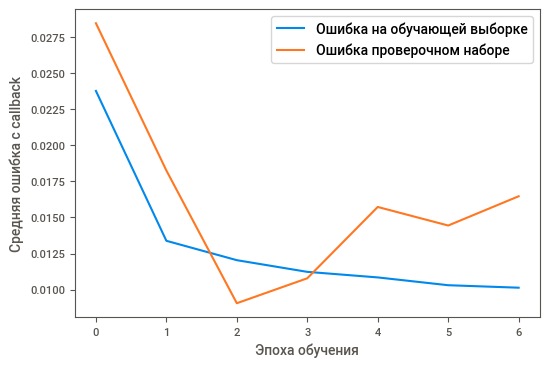

In [ ]:
# Обучение модели
model_simple.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = model_simple.fit(x_scaled,
                    y_scaled,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[earlystop, reduceLROnPlateau, model_Checkpoint])

compare_sharp_loss(history)

Epoch 1/50
188/190 [============================>.] - ETA: 0s - loss: 0.0151 - mae: 0.0873
Epoch 1: val_loss did not improve from 0.00906
190/190 [==============================] - 8s 13ms/step - loss: 0.0150 - mae: 0.0873 - val_loss: 0.0140 - val_mae: 0.0870 - lr: 0.0100
Epoch 2/50
188/190 [============================>.] - ETA: 0s - loss: 0.0114 - mae: 0.0751
Epoch 2: val_loss did not improve from 0.00906
190/190 [==============================] - 3s 16ms/step - loss: 0.0114 - mae: 0.0752 - val_loss: 0.0215 - val_mae: 0.1086 - lr: 0.0100
Epoch 3/50
190/190 [==============================] - ETA: 0s - loss: 0.0108 - mae: 0.0727
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.005999999865889549.

Epoch 3: val_loss did not improve from 0.00906
190/190 [==============================] - 3s 13ms/step - loss: 0.0108 - mae: 0.0727 - val_loss: 0.0389 - val_mae: 0.1480 - lr: 0.0100
Epoch 4/50
187/190 [============================>.] - ETA: 0s - loss: 0.0103 - mae: 0.0703
Epoch 4: val_l

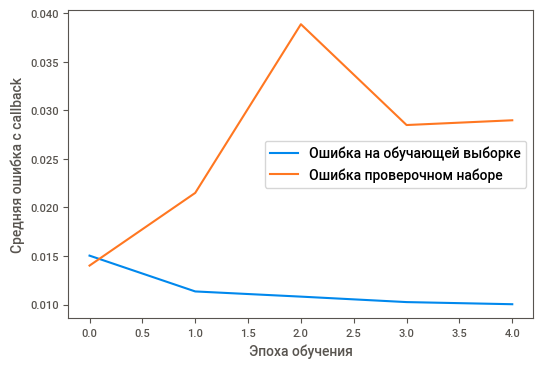

In [ ]:
# Дообучение модели

model_simple.compile(optimizer=Adam(learning_rate=1e-2), loss='mse', metrics=['mae'])

history = model_simple.fit(x_scaled,
                    y_scaled,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[earlystop, reduceLROnPlateau, model_Checkpoint])

compare_sharp_loss(history)


Epoch 1/30
91/95 [===========================>..] - ETA: 0s - loss: 0.0107 - mae: 0.0730
Epoch 1: val_loss did not improve from 0.00906
95/95 [==============================] - 6s 15ms/step - loss: 0.0107 - mae: 0.0727 - val_loss: 0.0275 - val_mae: 0.1174 - lr: 0.0100
Epoch 2/30
91/95 [===========================>..] - ETA: 0s - loss: 0.0098 - mae: 0.0685
Epoch 2: val_loss did not improve from 0.00906
95/95 [==============================] - 1s 12ms/step - loss: 0.0098 - mae: 0.0685 - val_loss: 0.0312 - val_mae: 0.1297 - lr: 0.0100
Epoch 3/30
91/95 [===========================>..] - ETA: 0s - loss: 0.0094 - mae: 0.0667
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.005999999865889549.

Epoch 3: val_loss did not improve from 0.00906
95/95 [==============================] - 1s 12ms/step - loss: 0.0095 - mae: 0.0667 - val_loss: 0.0455 - val_mae: 0.1692 - lr: 0.0100
Epoch 4/30
92/95 [============================>.] - ETA: 0s - loss: 0.0088 - mae: 0.0640
Epoch 4: val_loss did not im

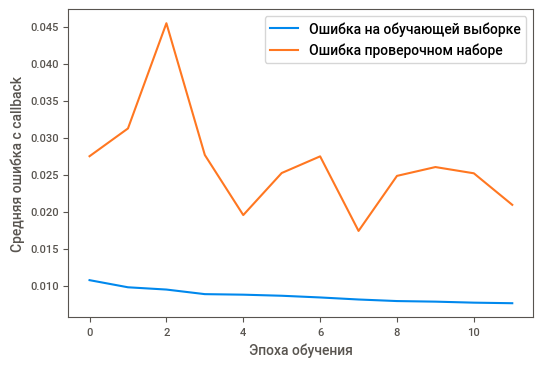

In [ ]:

model_simple.compile(optimizer=Adam(learning_rate=1e-2), loss='mse', metrics=['mae'])

history = model_simple.fit(x_scaled,
                    y_scaled,
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[earlystop, reduceLROnPlateau, model_Checkpoint])

compare_sharp_loss(history)


Выходные данные были обрезаны до нескольких последних строк (5000).
Верное значение 173 - предсказанное 171 в 25352 = 2
Верное значение 105 - предсказанное 120 в 25353 = -15
Верное значение 88 - предсказанное 125 в 25354 = -37
Верное значение 173 - предсказанное 171 в 25355 = 2
Верное значение 105 - предсказанное 120 в 25356 = -15
Верное значение 209 - предсказанное 168 в 25357 = 41
Верное значение 252 - предсказанное 201 в 25358 = 51
Верное значение 50 - предсказанное 129 в 25359 = -79
Верное значение 96 - предсказанное 126 в 25360 = -30
Верное значение 101 - предсказанное 126 в 25361 = -25
Верное значение 252 - предсказанное 201 в 25362 = 51
Верное значение 50 - предсказанное 129 в 25363 = -79
Верное значение 104 - предсказанное 126 в 25364 = -22
Верное значение 191 - предсказанное 152 в 25365 = 39
Верное значение 121 - предсказанное 108 в 25366 = 13
Верное значение 96 - предсказанное 108 в 25367 = -12
Верное значение 103 - предсказанное 113 в 25368 = -10
Верное значение 217 - предск

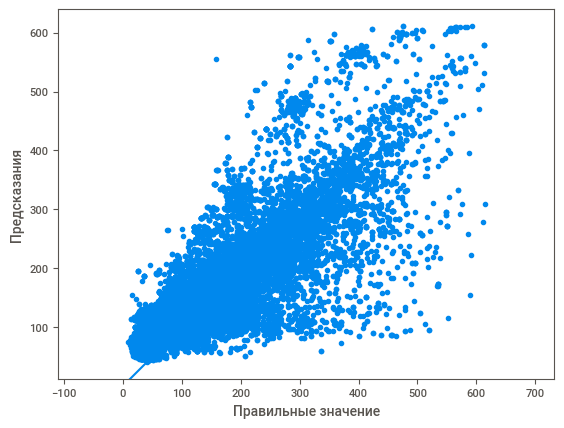

In [ ]:
#Выводим результаты проверки
y_unscal = y_scaler.inverse_transform(y_scaled.reshape(-1,1)).flatten()
y_pred = model_simple.predict(x_scaled)
y_pred_unscaled = y_scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
for i in range (0,len(y_unscal)):
    print(f'Верное значение {round(y_unscal[i])} - предсказанное {round(y_pred_unscaled[i])} в {i} =', round(y_unscal[i]) - round(y_pred_unscaled[i]))

plt.scatter(y_unscal, y_pred_unscaled)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([0, 250], [0, 250])
plt.show()

In [ ]:
# Сравнивает отскейленные данные
import numpy as np
def total_MAE_predict(model,x_test_wheel, y_test_wheel):

  # Инициализируем начальное значение ошибки
  mae = 0
  y_pred = model.predict(x_scaled)
  y_pred_unscaled = y_scaler.inverse_transform(y_pred).flatten()
  y_unscaled = y_scaler.inverse_transform(y_scaled.reshape(-1,1)).flatten()
  # Считаем среднюю цену, среднюю ошибку и средний процент ошибки
  mean_delta = np.mean(abs(y_pred_unscaled - y_unscaled))
  mean_price = np.mean(y_unscaled)

  print('Средняя ошибка: ', round(mean_delta))
  print('Средний период обточки: ', round(mean_price))
  print('Суммарный процент ошибки: ', round(100*mean_delta/mean_price), '%', sep='')

In [ ]:
# Оценим точность
total_MAE_predict(model_simple,
                  x_scaled,
                  y_scaled)

949/949 [==============================] - 4s 4ms/step
Средняя ошибка:  37
Средний период обточки:  154
Суммарный процент ошибки: 24%


## Модель 2

In [ ]:
# Обучение модели на простых данных

model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Epoch 1/30
90/95 [===========================>..] - ETA: 0s - loss: 0.0183 - mae: 0.0982
Epoch 1: val_loss did not improve from 0.00906
95/95 [==============================] - 5s 11ms/step - loss: 0.0179 - mae: 0.0971 - val_loss: 0.0208 - val_mae: 0.1017 - lr: 0.0010
Epoch 2/30
92/95 [============================>.] - ETA: 0s - loss: 0.0120 - mae: 0.0776
Epoch 2: val_loss did not improve from 0.00906
95/95 [==============================] - 1s 8ms/step - loss: 0.0119 - mae: 0.0775 - val_loss: 0.0226 - val_mae: 0.1016 - lr: 0.0010
Epoch 3/30
91/95 [===========================>..] - ETA: 0s - loss: 0.0109 - mae: 0.0728
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.

Epoch 3: val_loss did not improve from 0.00906
95/95 [==============================] - 1s 8ms/step - loss: 0.0108 - mae: 0.0728 - val_loss: 0.0231 - val_mae: 0.1030 - lr: 0.0010
Epoch 4/30
92/95 [============================>.] - ETA: 0s - loss: 0.0101 - mae: 0.0697
Epoch 4: val_loss did not imp

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


95/95 [==============================] - ETA: 0s - loss: 0.0089 - mae: 0.0640
Epoch 8: val_loss improved from 0.00845 to 0.00840, saving model to /content/Модели/model.h5
95/95 [==============================] - 1s 9ms/step - loss: 0.0089 - mae: 0.0640 - val_loss: 0.0084 - val_mae: 0.0703 - lr: 6.0000e-04
Epoch 9/30
93/95 [============================>.] - ETA: 0s - loss: 0.0086 - mae: 0.0628
Epoch 9: val_loss improved from 0.00840 to 0.00833, saving model to /content/Модели/model.h5
95/95 [==============================] - 1s 9ms/step - loss: 0.0086 - mae: 0.0629 - val_loss: 0.0083 - val_mae: 0.0706 - lr: 6.0000e-04
Epoch 10/30
93/95 [============================>.] - ETA: 0s - loss: 0.0084 - mae: 0.0619
Epoch 10: val_loss did not improve from 0.00833
95/95 [==============================] - 1s 12ms/step - loss: 0.0084 - mae: 0.0620 - val_loss: 0.0090 - val_mae: 0.0751 - lr: 6.0000e-04
Epoch 11/30
94/95 [============================>.] - ETA: 0s - loss: 0.0083 - mae: 0.0618
Epoch 11: 

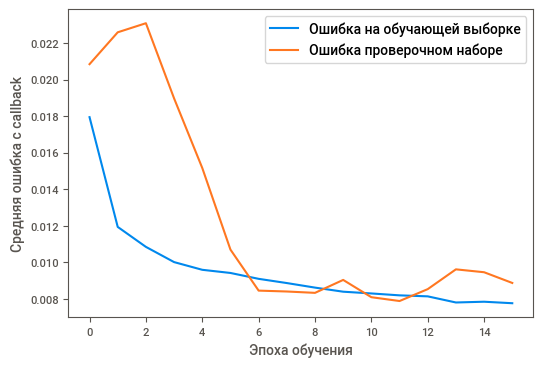

In [ ]:

model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = model.fit(x_scaled,
                    y_scaled,
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[earlystop, reduceLROnPlateau, model_Checkpoint])

compare_sharp_loss(history)


Выходные данные были обрезаны до нескольких последних строк (5000).
Верное значение 173 - предсказанное 124 в 25352 = 49
Верное значение 105 - предсказанное 102 в 25353 = 3
Верное значение 88 - предсказанное 106 в 25354 = -18
Верное значение 173 - предсказанное 124 в 25355 = 49
Верное значение 105 - предсказанное 102 в 25356 = 3
Верное значение 209 - предсказанное 147 в 25357 = 62
Верное значение 252 - предсказанное 197 в 25358 = 55
Верное значение 50 - предсказанное 131 в 25359 = -81
Верное значение 96 - предсказанное 126 в 25360 = -30
Верное значение 101 - предсказанное 126 в 25361 = -25
Верное значение 252 - предсказанное 197 в 25362 = 55
Верное значение 50 - предсказанное 131 в 25363 = -81
Верное значение 104 - предсказанное 126 в 25364 = -22
Верное значение 191 - предсказанное 131 в 25365 = 60
Верное значение 121 - предсказанное 103 в 25366 = 18
Верное значение 96 - предсказанное 104 в 25367 = -8
Верное значение 103 - предсказанное 121 в 25368 = -18
Верное значение 217 - предсказа

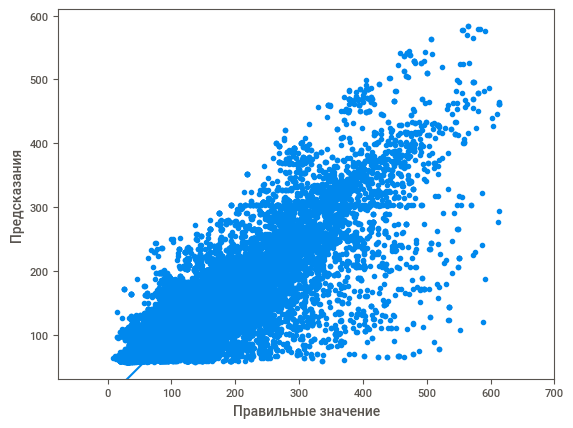

In [ ]:
#Выводим результаты проверки
y_unscal = y_scaler.inverse_transform(y_scaled.reshape(-1,1)).flatten()
y_pred = model.predict(x_scaled)
y_pred_unscaled = y_scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
for i in range (0,len(y_unscal)):
    print(f'Верное значение {round(y_unscal[i])} - предсказанное {round(y_pred_unscaled[i])} в {i} =', round(y_unscal[i]) - round(y_pred_unscaled[i]))

plt.scatter(y_unscal, y_pred_unscaled)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([0, 250], [0, 250])
plt.show()

In [ ]:
# Оценим точность
total_MAE_predict(model,
                  x_scaled,
                  y_scaled)

949/949 [==============================] - 5s 5ms/step
Средняя ошибка:  37
Средний период обточки:  154
Суммарный процент ошибки: 24%


## Модель 3

In [ ]:
# Обучение модели на простых данных

model_3 = Sequential()

model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.3))


model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.3))


model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.3))


model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.3))


model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

Epoch 1/30
95/95 [==============================] - ETA: 0s - loss: 0.0269 - mae: 0.1197
Epoch 1: val_loss did not improve from 0.00788
95/95 [==============================] - 3s 12ms/step - loss: 0.0269 - mae: 0.1197 - val_loss: 0.0089 - val_mae: 0.0673 - lr: 0.0010
Epoch 2/30
89/95 [===========================>..] - ETA: 0s - loss: 0.0105 - mae: 0.0715
Epoch 2: val_loss improved from 0.00788 to 0.00695, saving model to /content/Модели/model.h5
95/95 [==============================] - 1s 11ms/step - loss: 0.0105 - mae: 0.0714 - val_loss: 0.0070 - val_mae: 0.0602 - lr: 0.0010
Epoch 3/30
 1/95 [..............................] - ETA: 2s - loss: 0.0070 - mae: 0.0608

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94/95 [============================>.] - ETA: 0s - loss: 0.0093 - mae: 0.0667
Epoch 3: val_loss did not improve from 0.00695
95/95 [==============================] - 1s 14ms/step - loss: 0.0094 - mae: 0.0668 - val_loss: 0.0088 - val_mae: 0.0692 - lr: 0.0010
Epoch 4/30
93/95 [============================>.] - ETA: 0s - loss: 0.0089 - mae: 0.0650
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.

Epoch 4: val_loss did not improve from 0.00695
95/95 [==============================] - 1s 9ms/step - loss: 0.0089 - mae: 0.0648 - val_loss: 0.0078 - val_mae: 0.0652 - lr: 0.0010
Epoch 5/30
92/95 [============================>.] - ETA: 0s - loss: 0.0086 - mae: 0.0631
Epoch 5: val_loss did not improve from 0.00695
95/95 [==============================] - 1s 6ms/step - loss: 0.0085 - mae: 0.0631 - val_loss: 0.0087 - val_mae: 0.0697 - lr: 6.0000e-04
Epoch 6/30
87/95 [==========================>...] - ETA: 0s - loss: 0.0083 - mae: 0.0618Restoring model weights from the end 

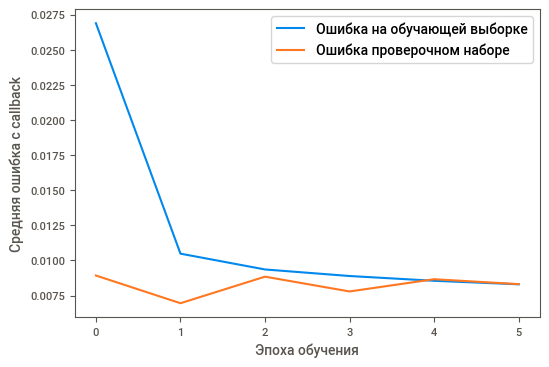

In [ ]:

model_3.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = model_3.fit(x_scaled,
                    y_scaled,
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[earlystop, reduceLROnPlateau, model_Checkpoint])

compare_sharp_loss(history)


In [ ]:
# Оценим точность
total_MAE_predict(model_3,
                  x_scaled,
                  y_scaled)

949/949 [==============================] - 2s 2ms/step
Средняя ошибка:  36
Средний период обточки:  154
Суммарный процент ошибки: 23%


## Модель 4

In [ ]:
# Обучение модели на простых данных

model_4 = Sequential()

model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(256, activation='relu'))
model_4.add(Dense(512, activation='relu'))
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

Epoch 1/30
90/95 [===========================>..] - ETA: 0s - loss: 0.0268 - mae: 0.1177
Epoch 1: val_loss did not improve from 0.00695
95/95 [==============================] - 3s 7ms/step - loss: 0.0259 - mae: 0.1151 - val_loss: 0.0099 - val_mae: 0.0735 - lr: 0.0010
Epoch 2/30
89/95 [===========================>..] - ETA: 0s - loss: 0.0083 - mae: 0.0606
Epoch 2: val_loss did not improve from 0.00695
95/95 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0606 - val_loss: 0.0130 - val_mae: 0.0857 - lr: 0.0010
Epoch 3/30
94/95 [============================>.] - ETA: 0s - loss: 0.0075 - mae: 0.0570
Epoch 3: val_loss did not improve from 0.00695
95/95 [==============================] - 0s 5ms/step - loss: 0.0075 - mae: 0.0569 - val_loss: 0.0098 - val_mae: 0.0766 - lr: 0.0010
Epoch 4/30
86/95 [==========================>...] - ETA: 0s - loss: 0.0071 - mae: 0.0552
Epoch 4: val_loss did not improve from 0.00695
95/95 [==============================] - 0s 5ms/step - loss:

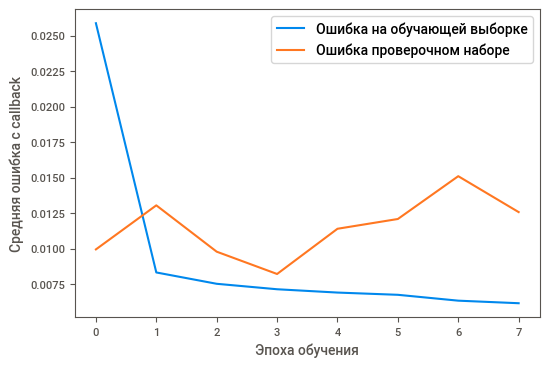

In [ ]:

model_4.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = model_4.fit(x_scaled,
                    y_scaled,
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[earlystop, reduceLROnPlateau, model_Checkpoint])

compare_sharp_loss(history)

In [ ]:
# Оценим точность
total_MAE_predict(model_4,
                  x_scaled,
                  y_scaled)

949/949 [==============================] - 2s 2ms/step
Средняя ошибка:  34
Средний период обточки:  154
Суммарный процент ошибки: 22%
